In [1]:
import pandas as pd
import numpy as np
import scipy
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz






In [2]:
df = pd.read_csv('ks-projects-2018.csv')
df.dropna(inplace=True)
df.isnull().values.any() 

False

In [3]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,10/9/2015,1000.0,8/11/2015 12:12,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,11/1/2017,30000.0,9/2/2017 4:43,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2/26/2013,45000.0,1/12/2013 0:20,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,4/16/2012,5000.0,3/17/2012 3:24,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,8/29/2015,19500.0,7/4/2015 8:35,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
Y = df['state']
df.drop(['country','launched','deadline','name', 'category', 'main_category', 'currency', 'ID', 'state'], 1, inplace=True)

In [8]:
corrmat = df.corr()

print(corrmat)

                      goal   pledged   backers  usd pledged  usd_pledged_real  \
goal              1.000000  0.007327  0.003969     0.005534          0.005072   
pledged           0.007327  1.000000  0.717858     0.857370          0.952736   
backers           0.003969  0.717858  1.000000     0.697426          0.753449   
usd pledged       0.005534  0.857370  0.697426     1.000000          0.907743   
usd_pledged_real  0.005072  0.952736  0.753449     0.907743          1.000000   
usd_goal_real     0.942691  0.004992  0.004476     0.006172          0.005566   

                  usd_goal_real  
goal                   0.942691  
pledged                0.004992  
backers                0.004476  
usd pledged            0.006172  
usd_pledged_real       0.005566  
usd_goal_real          1.000000  


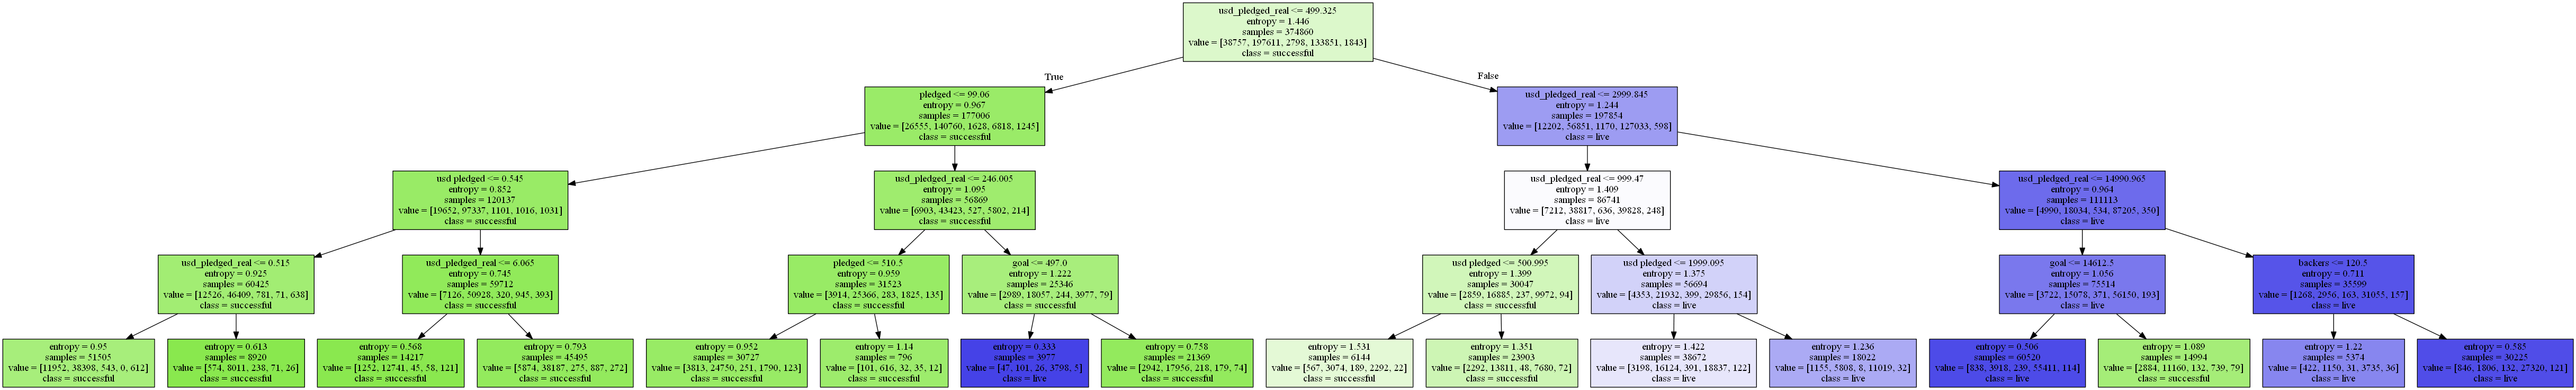

In [10]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
)


X = df
decision_tree.fit(X, Y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=df.columns,
    class_names=['failed', 'successful' , 'canceled', 'live'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [12]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y, decision_tree)

TypeError: Expected sequence or array-like, got estimator DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')